# Исследование данных сервиса покупки билетов

Исполнитель: Никитина Александра  
Email: nikilinalexa@gmail.com  
Telegram: `https://t.me/alexandrakilina`

**Содержимое проекта**:
1. Введение
2. Загрузка данных, предобработка и подготовка к исследованию
3. Исследовательский анализ данных
4. Статистический анализ данных
5. Выводы и рекомендации

## Введение

**Цели исследования**:
Провести исследовательский анализ данных сервиса Яндекс.Афиша с упором на изучение изменения активности пользователей осенью по сравнению с летним периодом.

**Задачи**:

Часть 1.
* Загрузить данные датасетов `*название файла скрыто*.csv`, `*название файла скрыто*.csv`, `*название файла скрыто*.csv`.
* Изучить данные датасетов и ознакомиться с ними
* Провести предобработку данных и подготовить их к исследованию
* Сформировать новые столбцы, необходимые для дальнейшего анализа
* Сформировать датафрейм, который будет использоваться для исследовательского анализа данных

*Внимание! Часть информации о данных датасетов при ознакомлении с ними - скрыта*

Часть 2.
* Проанализировать распределение заказов по сегментам и их сезонные изменения
* Проанализировать осеннюю активность пользователей и популярность событий
* Изучить, как популярные события распределены по регионам и партнерам
* Проверить гипотезы относительно активности пользователей мобильных устройств:
  * Гипотеза относительно активности пользователей мобильных и стационарных устройств
 H0: Среднее количество заказов на одного пользователя мобильного приложения равно среднему количеству заказов пользователей стационарных устройств.
 Н1: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
  * Гипотеза относительно активности пользователей мобильных и стационарных устройств
 H0: Среднее время между заказами пользователей мобильных приложений такое же, как и у пользователей стационарных устройств.
 Н1: Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.


**Информация о датасетах**

Датасет с информацией о заказах билетов:\
 *Подробная информация о полях датасета скрыта*

Датасет с информацией о мероприятиях:\
 *Подробная информация о полях датасета скрыта*

Датасет с информацией о курсах валют:\
 *Подробная информация о полях датасета скрыта*

## Загрузка данных, предобработка и подготовка к исследованию

###  Шаг 1. Загрузка данных и знакомство с ними

Названия файлов: 

1. *название файла скрыто.csv* - информация обо всех заказах билетов, совершенных с двух типов устройств - мобильных и стационарных
2. *название файла скрыто.csv* - информация о событиях, включая город и регион события, информация о площадке проведения мероприятия
3. *название файла скрыто.csv* - информация о курсе тенге к российскому рублю за 2024 год, значения в рублях для 100 тенге

#### Вывод общей информации

In [1]:
# Импортируем библиотеки
import pandas as pd

# установим библиотеку jupyter-black для автоматического форматирования кода
!pip install jupyter-black

# Импортируем библиотеку jupyter_black
import jupyter_black

# Импортируем библиотеку matplotlib
import matplotlib.pyplot as plt

# Импортируем библиотеку seaborn
import seaborn as sns

# Импортируем библиотеку для проведения теста шапиро
from scipy.stats import shapiro

# Импортируем тест Манна-Уитни
from scipy.stats import mannwhitneyu

# Импортируем библиотеку scipy
from scipy import stats as st

# Установим библиотеку matplotlib-venn и импортируем функцию venn2 из библиотеки matplotlib
!pip install matplotlib-venn -q
from matplotlib_venn import venn2

**Изучим датафрейм df_orders**

In [2]:
# Выгружаем данные в переменные df_orders, df_events, df_currency
url = "информация скрыта"
df_orders = pd.read_csv(url+'информация скрыта.csv')
df_events = pd.read_csv(url+'информация скрыта.csv')
df_currency = pd.read_csv(url+'информация скрыта.csv')

In [3]:
# Выведем информацию о датафрейме df_orders
#df_orders.info()

In [92]:
# Посчитаем количество пустых значений
#df_orders.isna().sum()

In [5]:
# Выведем первые 5 строк датафрейма df_orders
#df_orders.head()

Датафрейм `df_orders` включает в себя 290849 строк и 14 полей:\
 *Подробная информация о полях и типах данных удалена, так как защищена авторским правом*

 * уникальный идентификатор заказа, необходимо понизить размерность
 * уникальный идентификатор пользователя
 * дата создания заказа, необходимо привести к типу данных для даты
 * дата и время создания заказа (московское время), необходимо привести к типу данных для даты
 * идентификатор мероприятия
 * название сети кинотеатров
 * возрастное ограничение мероприятия
 * валюта оплаты
 * тип устройства, с которого был оформлен заказ (mobile / desktop)
 * выручка от заказа, необходимо проверить на наличие выбросов, возможно отфильтровать данные, либо убедиться в том, что распределение смещено и данные не являются выбросами
 * название билетного оператор
 * количество купленных билетов, необходимо проверить на наличие выбросов
 * общая сумма заказа, необходимо проверить на наличие выбросов.
 * количество дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.


**Изучим датафрейм df_events**

In [6]:
# Выведем информацию о датафрейме df_events
#df_events.info()

In [7]:
## Посчитаем количество пустых значений
#df_events.isna().sum()

In [8]:
# Выведем первые 5 строк датафрейма df_events
#df_events.head()

Датафрейм `df_events` включает в себя 22427 строк и 11 полей:\
 *Подробная информация о полях и типах данных удалена, так как защищена авторским правом*
 * уникальный идентификатор мероприятия
 * название мероприятия
 * описание типа мероприятия
 * основной тип мероприятия
 * организатор мероприятия
 * название региона
 * название город
 * уникальный идентификатор площадки
 * название площадки
 * адрес площадки

**Изучим датафрейм df_currency**

In [9]:
# Выведем информацию о датафрейме df_currency
#df_currency.info()

In [10]:
# Посчитаем количество пустых значений
#df_currency.isna().sum()

In [11]:
# Выведем первые 5 строк датафрейма df_currency
#df_currency.head()

Датафрейм `df_currency` включает в себя 357 строк и 4 поля:\
 *Подробная информация о полях и типах данных удалена, так как защищена авторским правом*\

 * дата
 * номинал
 * курс валюты к рублю
 * обозначение валюты

#### Вывод по результатам Шага 1 "Загрузка данных и знакомство с ними":

Перед проведением предобработки объединим данные датафрейма `df_orders` и `df_events` в один датафрейм

В ходе предобработки данных необходимо выполнить следующее для столбцов, которые будут участвовать в дальнейшем анализе данных и проверке гипотез:

 * Проверить категориальные значения на уникальность
 * Проверить наличие выбросов в столбцах с непрерывными данными
 * Изменить тип данных в столбцах с датой
 * Проверить наличие явных и неявных дубликатов
 * Уменьшить разрядность int, если применимо
 


### Шаг 2. Предобработка данных и подготовка их к исследованию

#### Объединение датафреймов

In [12]:
# Объединим датафреймы df_orders и df_events по полю event_id
df = df_orders.merge(df_events, on='event_id', how='left')

#Выведем первые строки объединенного датафрейма
#df.head()

**Вывод:**
Получен датафрейм `df`, объединяющий в себе `df_orders` и `df_events` по полю `event_id`

#### Проверка данных объединенного датафрейма на пропуски

In [13]:
#Проверим еще раз данные на пропуски
#df.isna().sum()

*Промежуточный вывод:*\
Наблюдается 21940 пропусков в days_since_prev.\
Кроме этого, при объединении датафреймов, по-видимому информация не для всех мероприятий присутствовала в датафрейме df_events, все столбцы датафрейма event_id включают в себя 238 пропусков.\
Посчитаем процент пропусков на примере столбца event_name, после чего примем решение, что делать с выявленными пропусками

In [14]:
# Посчитаем кол-во строк в датафрейме
df_rows_count = len(df)
display(f'Датафрейм df содержит {df_rows_count} строк')

# Посчитаем количество пропусков в строке event_name
df_na_count_event_name = df['event_name'].isna().sum()
display(f'Поле event_name содержит {df_na_count_event_name} пустых строк')

# Посчитаем долю пропусков в строке event_name
event_name_na_share = round(df_na_count_event_name / df_rows_count * 100, 2)
display(f'Доля пропусков в event_name составляет {event_name_na_share}%')

'Датафрейм df содержит 290849 строк'

'Поле event_name содержит 238 пустых строк'

'Доля пропусков в event_name составляет 0.08%'

*Промежуточный вывод*\
Так как доля пропусков составляет меньше 1 процента, их можно удалить

In [15]:
# удалим поля с пропусками в строке event_name
df_clean = df[~df['event_name'].isna()]

# Посчитаем количество строк в новом датафрейме
display(f'Количество строк в очищенном датафрейме df_clean: {len(df_clean)}')

'Количество строк в очищенном датафрейме df_clean: 290611'

**Вывод:**\
В объединенном датафрейме `df` ожидаемо наблюдаются пропуски в `days_since_prev` в количестве 21940 ввиду особенностей сбора данных.\ 
Кроме этого, при объединении датафреймов, по-видимому не для всех `event_id` присутствовала информация в датафрейме `df_events`, в результате чего во всех полях, присоединенных от датафрейма `df_events`, присутствует 238 пустых строк, которые составляют 0.08% от общего количества строк.\
В связи с тем, что потеря 0.08% строк от их общего количества не повлияет на результаты анализа, было решено удалить эти строки.\
Сформирован датафрейм `df_clean`.



#### Изучение значений в ключевых столбцах объединенного датафрейма

Перечень столбцов, которые потребуются для дальнейшей работы:
1. created_dt_msk
2. event_type_main - категориальное знечение
3. device_type_canonical - категориальное знечение
4. age_limit - категориальное значение
5. order_id
6. revenue - количественное значение. Для kzt нужно будет потом пересчитать в рубли
7. tickets_count -количественное значение.
8. event_id
9. region_name - категориальное знечение
10. service_name - - категориальное знечение
11. user_id

Изучим значения в этих столбцах, а также изучим значения в столбцах датафрейма df_currency 

##### Категориальные значения

In [16]:
# Изучим категориальные данные в столбце event_type_main
#df_clean['event_type_main'].value_counts()

In [17]:
# Изучим категориальные данные в столбце device_type_canonical
df_clean['device_type_canonical'].value_counts()

mobile     232490
desktop     58121
Name: device_type_canonical, dtype: int64

In [18]:
# Изучим категориальные данные в столбце age_limit
#df_clean['age_limit'].value_counts()

In [19]:
# Изучим категориальные данные в столбце region_name
#df_clean['region_name'].value_counts()

Выведем в виде списка, расположенного в алфавитном порядке

In [20]:
unique_regions_sorted = sorted(df_clean['region_name'].unique().tolist())
#display(unique_regions_sorted)

In [21]:
# Изучим категориальные данные в столбце organizers
#df_clean['service_name'].value_counts()

In [22]:
unique_services_sorted = sorted(df_clean['service_name'].unique().tolist())
#display(unique_services_sorted)

**Вывод о категориальных значениях**:\
Категориальные величины выглядят адекватно, категории уникальны, отсутсвуют значения, которые могут обозначать пропуски в данных.

##### Количественные значения

In [23]:
# Изучим revenue, для этого отфильтруем данные по валютам
df_clean_rub = df_clean[df_clean['currency_code'] == 'rub']
df_clean_kzt = df_clean[df_clean['currency_code'] == 'kzt']

In [24]:
# Выведем статистическую информацию
display(df_clean_rub['revenue'].describe())
display(df_clean_kzt['revenue'].describe())

count    285542.000000
mean        548.013929
std         871.750181
min         -90.760000
25%         114.170000
50%         346.630000
75%         793.320000
max       81174.540000
Name: revenue, dtype: float64

count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64

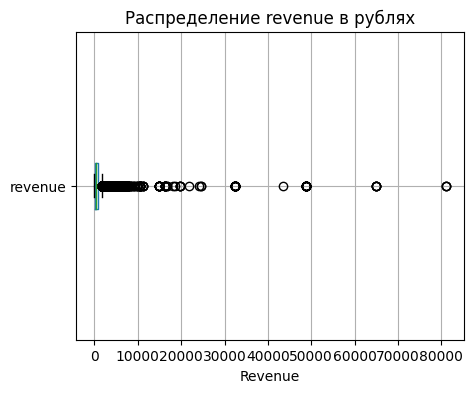

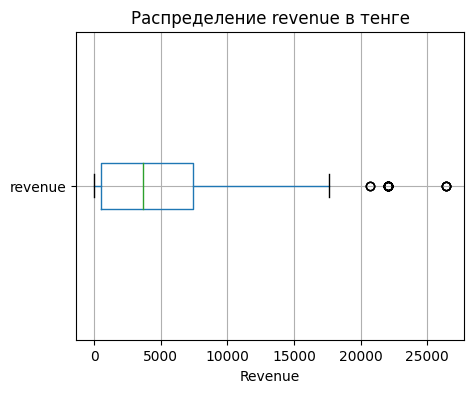

In [25]:
# Стоим диаграмму размаха для revenue в рублях методом boxplot
boxplot = df_clean_rub.boxplot(column='revenue',
                       vert=False,
                       figsize=(5,4))
# Добавляем заголовок
boxplot.set_title('Распределение revenue в рублях')
boxplot.set_xlabel('Revenue')

plt.show()

# Стоим диаграмму размаха для revenue в тенге методом boxplot
boxplot = df_clean_kzt.boxplot(column='revenue',
                       vert=False,
                       figsize=(5,4))
# Добавляем заголовок
boxplot.set_title('Распределение revenue в тенге')
boxplot.set_xlabel('Revenue')

plt.show()

*Промежуточный вывод*:\
Выбросы наблюдаются, поэтому следует отфильтровать выбросы в вырнучке по 99-му процентилю

In [26]:
# Отфильтруем датасет по 99-му персентилю для рублей
# Находим 99-й персентиль
outliers_rub = df_clean_rub['revenue'].quantile(0.99)

# Отбираем данные, оставляя значения меньше найденного
df_clean_rub_filtered = df_clean_rub[df_clean_rub['revenue'] < outliers_rub]


In [27]:
# Отфильтруем датасет по 99-му персентилю для тенге
# Находим 99-й персентиль
outliers_kzt = df_clean_kzt['revenue'].quantile(0.99)

# Отбираем данные, оставляя значения меньше найденного
df_clean_kzt_filtered = df_clean_kzt[df_clean_kzt['revenue'] < outliers_kzt]

In [28]:
# Объединим датафреймы в df_clean_filtered
df_clean_filtered = pd.concat([df_clean_rub_filtered, df_clean_kzt_filtered], ignore_index=True)

*Промежуточный вывод:*\
Revenue для rub показало ассимметрию в распределении, наблюдаются выбросы.\
Для kzt также наблюдаются выбросы в revenue, по этой причине сформирован `df_clean_filtered`, в котором отфильтрованы данные по обеим валютам по 99 персентилю.

In [29]:
# Теперь оценим tickets_count на наличие выбросов
# Выведем статистическую информацию
display(df_clean_filtered['tickets_count'].describe())

count    287529.000000
mean          2.739108
std           1.162387
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          57.000000
Name: tickets_count, dtype: float64

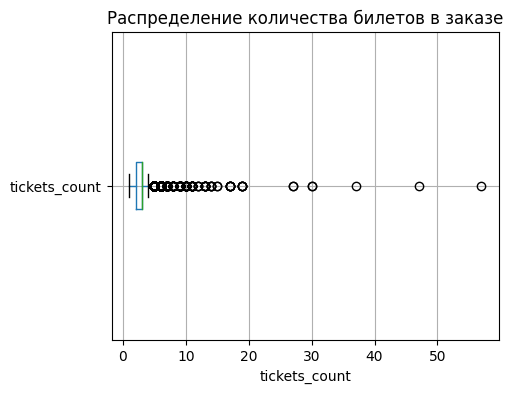

In [30]:
# Стоим диаграмму размаха методом boxplot
boxplot = df_clean_filtered.boxplot(column='tickets_count',
                       vert=False,
                       figsize=(5,4))
# Добавляем заголовок
boxplot.set_title('Распределение количества билетов в заказе')
boxplot.set_xlabel('tickets_count')

plt.show()

*Промежуточный вывод:*

В поле `tickets_count` наблюдаются значения, похожие на выборосы вверх количества купленных билетов. \
Возможно, это обусловлено тем, что обычно люди покупают по несколько билетов, но в некоторых случаях присутсвуют крупные заказы, например, на экскурсионную группую. Максимальное количество купленных билетов - 57, что является количеством мест в большом экскурсионном автобусе. \
Скорее всего это не выбросы.

**Вывод о количественных значениях:**\
Revenue для rub показало ассимметрию в распределении, наблюдаются выбросы. для kzt также наблюдаются выбросы в revenue, по этой причине сформирован `df_clean_filtered`, в котором отфильтрованы данные по обеим валютам по 99 персентилю.

В столце `tickets_count` наблюдается смещение величины вверх относительно медианы и среднего, возможно, это обусловлено тем, что обычно люди покупают по несколько билетов, но в некоторых случаях присутсвуют крупные заказы, например, на экскурсионную группую. Максимальное количество купленных билетов - 57, что является количеством мест в большом экскурсионном автобусе. Тем самым, скорее всего это не выбросы.

#### Проверка данных датафрейма df_currency

In [31]:
#df_currency.info()

In [32]:
# Выведем статистическую информацию для curs
display(df_currency['curs'].describe())

count    357.000000
mean      19.755818
std        0.833798
min       17.848600
25%       19.120200
50%       19.876000
75%       20.443300
max       21.937100
Name: curs, dtype: float64

In [33]:
# Выведем уникальные значения в столбце nominal
#df_currency['nominal'].value_counts()

In [34]:
# Выведем уникальные значения в столбце cdx
#df_currency['cdx'].value_counts()

**Вывод:**

 Данные датафрейма `df_currency` не выглядят аномально. В поле curs медиана и среднее близки, значит выбросов нет

#### Проверка на явные и неявные дубликаты

Ранее уже были изучены категориальные значения, которые могут представлять собой и неявные дубликаты, неявные дубликаты выявлены не были

In [35]:
# Считаем, сколько раз встречается каждый event_id (в условии сказано, что это уникальный идентификатор мероприятия)
event_counts = df_clean_filtered['event_id'].value_counts()

# Оставляем только те, которые встречаются больше одного раза
non_unique_event_ids = event_counts[event_counts > 1].index

# Отбираем строки, в которые event_id входит в список

diplicate_rows_events = df_clean_filtered[df_clean_filtered['event_id'].isin(non_unique_event_ids)]
duplicate_rows_events = diplicate_rows_events.sort_values(by='event_id', ascending=True)
# Количество неуникальных event_id
display(f'Количество неуникальных event_id: {len(non_unique_event_ids)}')



'Количество неуникальных event_id: 16292'

In [36]:
# Выведем строки, в которые event_id входит в список
#display(diplicate_rows_events)

*Промежуточный вывод:*\
Изучив данные, можно сказать, что это не дубликаты, а к одному мероприятию относится несколько заказов

In [37]:
# Оценим неявные дубликаты по бронированию билета без учета идентификаторов заказа
# Проверим сочетание created_ts_msk, event_id, user_id
duplicates_created_ts_event_user = df_clean_filtered.duplicated(subset=['created_ts_msk','event_id', 'user_id'], keep=False)
duplicates_created_ts_event_user = duplicates_created_ts_event_user.sum()
display(duplicates_created_ts_event_user)

221

*Промежуточный вывод:*\
Выявлен 221 неявный дубликат! 

In [38]:
# Посчитаем долю неявных дубликатов от общего количества строк
duplicates_share = duplicates_created_ts_event_user / len(df_clean_filtered)*100
display(duplicates_share)

0.07686181219981289

*Промежуточный вывод:*\
Доля неявных дубликатов составляет 0.077% Удалим их

In [39]:
# Удалим неявные дубликаты, оставив только первую встречу каждого сочетания
df_deduplicated = df_clean_filtered.drop_duplicates(subset=['created_ts_msk', 'event_id', 'user_id'], keep='first')

# Проверим, насколько уменьшилось количество строк
print(f"До удаления: {len(df_clean_filtered)}")
print(f"После удаления: {len(df_deduplicated)}")

До удаления: 287529
После удаления: 287411


In [40]:
# Проверим наличие явных дубликатов
df_deduplicated.duplicated().sum()

0

**Вывод:**\
Проведена проверка на наличие явных и неявных дубликатов.\
Явные дубликаты не выявлены.\
Неявные дубликаты по сочетанию  `created_ts_msk`, `event_id`, `user_id` были выявлены в размере 0.07% от общего количества записей.\
Неявные дубликаты были удалены, сформирован датафрейм `df_deduplicated`

#### Преобразование типов данных


Необходимо преобразовать типы данных для следующих столбцов датафрейма `df_deduplicated`:
1. Перевести тип данных `object` в формат `datetime`: `created_dt_msk`, `created_ts_msk`
2. Понизить разрядность `int64`: `order_id`, `event_id`, `age_limit`, `tickets_count`, `venue_id`
3. `float64` заменить на `int`: `days_since_prev`
4. `int64` заменить на `object`: `venue_name`

В датафрейме `df_currency`:
1. Перевести тип данных `object` в формат `datetime`: `data`
2. Понизить разрядность: `nominal`


In [41]:
# Меняем float64 на int
df_deduplicated = df_deduplicated.copy()
df_deduplicated['days_since_prev'] = df['days_since_prev'].astype('int64', errors='ignore')

# Понижаем разрядность int
df_deduplicated['order_id'] = pd.to_numeric(df_deduplicated['order_id'], downcast='integer')
df_deduplicated['event_id'] = pd.to_numeric(df_deduplicated['event_id'], downcast='integer')
df_deduplicated['age_limit'] = pd.to_numeric(df_deduplicated['age_limit'], downcast='integer')
df_deduplicated['tickets_count'] = pd.to_numeric(df_deduplicated['tickets_count'], downcast='integer')
df_deduplicated['venue_id'] = pd.to_numeric(df_deduplicated['venue_id'], downcast='integer')

# Int64 меняем на object 
df_deduplicated['venue_name'] = df_deduplicated['venue_name'].astype('object', errors='ignore')

# Преобразуем object в datetime
df_deduplicated['created_dt_msk'] = pd.to_datetime(df_deduplicated['created_dt_msk'], errors='coerce')
df_deduplicated['created_ts_msk'] = pd.to_datetime(df_deduplicated['created_ts_msk'])

In [42]:
# сделаем преобразование форматов в датафрейме df_currency
# Преобразуем object в datetime
df_currency['data'] = pd.to_datetime(df_currency['data'])
# Понижаем разрядность int
df_currency['nominal'] = pd.to_numeric(df_currency['nominal'], downcast='integer')

**Вывод:**\
Преобразованы типы данных для следующих столбцов датафрейма `df_deduplicated`:
1. тип данных `object` в `datetime`: `created_dt_msk`, `created_ts_msk`
2. понижена разрядность `int64`: `order_id`, `event_id`, `age_limit`, `tickets_count`, `venue_id`
3. `float64` заменено на `int`: `days_since_prev`
4. `int64` заменено на `object`: `venue_name`

В датафрейме `df_currency`:
1. тип данных object в формат `datetime`: `data`
2. Понижена разрядность: `nominal`

#### Создание новых столбцов

Необходимо выполнить следующее:
- `revenue_rub`: привести выручку с заказа к единой валюте - российскому рублю;
- `one_ticket_revenue_rub`: рассчитать выручку с продажи одного билета на мероприятие;
- `month`: выделить месяц оформления заказа в отдельный столбец;
- `season`: создайть столбец с информацией о сезонности с категориями: `'лето'`, `'осень'`, `'зима'`, `'весна'`.

In [43]:
# Создадим финальный датафрейм, в который будем добавлять новые столбцы
df_final = df_deduplicated

In [44]:
# Создадим датафрейм, где будет только дата и курс
df_curs = df_currency[['data', 'curs']]

# Объединим датафреймы df_final (по created_dt_msk) и df_curs (по data)
df_final = df_final.merge(df_curs, left_on='created_dt_msk', right_on='data', how='left')

#print(df_final.columns)


In [45]:
# Нормализуем курс kzt на 1 рубль
df_final['curs'] = df_final['curs']/100

In [46]:
# Для выбора правильного revenue, создадим функцию
def currency_exchange(row):
    if row['currency_code'] == 'kzt':
        return row['revenue'] * row['curs']
    else:
        return row['revenue']
# Создадим столбец revenue_rub путем приведения выручки с заказа к рублю
df_final['revenue_rub'] = df_final.apply(currency_exchange, axis=1)

In [47]:
# Создадим столбец one_ticket_revenue_rub
df_final['one_ticket_revenue_rub'] = df_final['revenue_rub'] / df_final['tickets_count']

In [48]:
# Выделим месяц оформления заказа
df_final['month'] = df_final['created_dt_msk'].dt.to_period('M')

# выведем результат на экран
display(df_final['month'].value_counts())


2024-10    99236
2024-09    69296
2024-08    44529
2024-07    40392
2024-06    33958
Freq: M, Name: month, dtype: int64

In [49]:
# Для создания категорий по месяцам, создадим функцию get_season
def get_season(month):
    if month in [12, 1, 2]:
        return 'зима'
    if month in [3, 4, 5]:
        return 'весна'
    if month in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'
    
# создадим столбец с сезонностью
df_final['season'] = df_final['month'].apply(lambda p: get_season(p.month))

In [50]:
# Выведем финальный датафрейм 
# df_final.info()

In [51]:
# Удалим столбец curs и data, так как они не нужны по условию задачи
df_final = df_final.drop(columns=['data', 'curs'])

**Вывод:** 
1. Сформирован финальный датафрейм `df_final`
2. В датафрейм добавлены следующие столбцы:
 * `revenue_rub` - выручка с заказа в рублях
 * `one_ticket_revenue_rub` - выручка с продажи одного билета на мероприятие
 * `month` - месяц оформления заказа
 * `season` - информация о сезонности с категориями: лето, осень, зима, весна

#### Результаты предобработки

In [52]:
# Посчитаем количество столбцов в финальном датафрейме
df_final_count = len(df_final)
deleted_count = df_rows_count - df_final_count

display(f'Финальный датафрейм df_final включает в себя {df_final_count} строк, исходный датафрейм включал в себя {df_rows_count} строк, удалено {deleted_count} строк')

'Финальный датафрейм df_final включает в себя 287411 строк, исходный датафрейм включал в себя 290849 строк, удалено 3438 строк'

In [53]:
# Посчитаем процент удаленных строк
deleted_percent = round( deleted_count / df_rows_count * 100, 2)
display(f'Удалено {deleted_percent}% строк от исходного датафрейма')

'Удалено 1.18% строк от исходного датафрейма'

In [54]:
# Выведем первые 5 строк финального датафрейма df_final
# df_final.head()

**Вывод**

Сформирован финальный датафрейм `df_final`:

1. Датафрейм `df_final` сформирован путем объединения датафреймов `df_orders` и `df_events` по полю `event_id`.
2. После объединения результирующий датафрейм включает в себя 238 пропусков. Причина: не для всех `event_id` из датафрейма `df_orders` присутствовала информация в датафрейме `df_events`. Пустые строки в размере 0.08% от общего количества удалены.
3. Изучены категориальные значения в столбцах: `event_type_main`, `device_type_canonical`, `age_limit`, `region_name`, `service_name`. Категориальные величины выглядят адекватно, категории уникальны, отсутсвуют значения, которые могут обозначать пропуски в данных.
4. Изучены количественные величины в столбцах `revenue`, `tickets_count`. `Revenue` для rub показало ассимметрию в распределении, наблюдаются выбросы.  Отфильтрованы данные по 99 персентилю. В столце `tickets_count` наблюдается смещение значений вверх, возможно, это обусловлено тем, что обычно люди покупают по несколько билетов, но в некоторых случаях присутсвуют крупные заказы, например, на экскурсионную группую. Максимальное количество купленных билетов - 57, что, вероятнее всего, является количеством мест в большом экскурсионном автобусе.
5. Также изучены значения в датафрейме `df_currency`, аномальные результаты не выявлены.
6. Проверено наличие явных и неявных дубликатов. Явные дубликаты не выявлены. Неявные дубликаты по сочетанию `created_ts_msk`, `event_id`, `user_id` обнаружены, их количество составило 0.07% от общего количества записей. Неявные дубликаты удалены.
7. Преобразованы типы данных следующих столбцов объединенного датафрейма:
    1. тип данных `object` в формат `datetime`: `created_dt_msk`, `created_ts_msk`
    2. понижена разрядность `int64`: `order_id`, `event_id`, `age_limit`, `tickets_count`, `venue_id`
    3. `float64` заменено на `int`: `days_since_prev`
    4. `int64` заменено на `object`: `venue_name`
8. В датафрейме `df_currency` преобразованы типы данных следующих столбцов:
    1. тип данных `object` в формат `datetime`: `data`
    2. Понижена разрядность: `nominal`
9. В объединенный датафрейм добавлены следующие столбцы:
- `revenue_rub` - выручка с заказа в рублях
- `one_ticket_revenue_rub` - выручка с продажи одного билета на мероприятие
- `month` - месяц оформления заказа
- `season` - информация о сезонность с категориями: лето, осень, зима, весна

Финальный датафрейм `df_final` включает в себя 287411 строк, исходный датафрейм включал в себя 290849 строк, в ходе предобработки удалено 1.18% строк от исходного датафрейма

## Исследовательский анализ данных

### Анализ распределения заказов по сегментам и их сезонные изменения

**Задача:**

Необходимо изучить изменение пользовательской активности и пользовательского интереса к покупке билетов на мероприятия в связи с сезонностью (лето - осень):

1. Проверить, фиксируется ли увеличение заказов от июня к ноябрю 2024 года.
2. Сравнить распределение заказов билетов по разрезам: тип мероприятия, тип устройства, возрастной рейтинг мероприятия
3. Изучить изменение выручки с продажи билета в разрезе типа мероприятия и сезона.
4. Проанализовать распределение заказов по категориям с наступлением осеннего периода.

#### Динамика количества заказов по месяцам


In [55]:
# Сгруппируем данные по типу устройств и месяцам и посчитаем количество заказов
df_grouped_month = df_final.groupby(['month'])['order_id'].count()

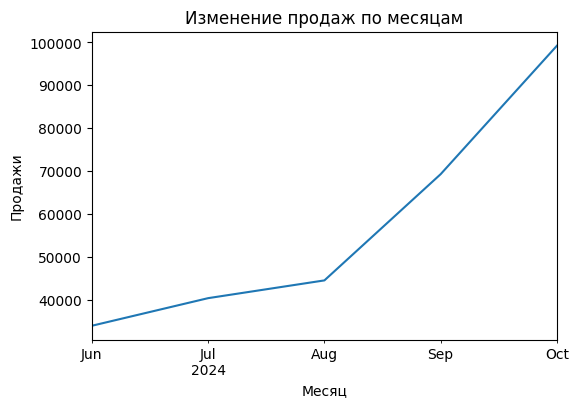

In [56]:
# Построим линейный график изменения продаж по месяцам
plt.figure(figsize=(6, 4))
df_grouped_month.plot(
kind='line',
x='month',
y='order_id',
title='Изменение продаж по месяцам')

#Создадим подписи к графику
plt.xlabel('Месяц')
plt.ylabel('Продажи')
plt.show()

*Промежуточный вывод о динамике заказов по месяцам*

Наблюдается рост количества заказов от июня к ноябрю 2024 года

#### Сравнение распределения заказов билетов в разрезах типов мероприятий, типов устройств и возрастных категорий

##### Сравнение распределения заказов билетов по типам мероприятий

In [57]:
# Cравним распределение заказов билетов для осеннего и летнего периодов по типу мероприяий
df_grouped_orders_events = df_final.groupby(['season', 'event_type_main'])['order_id'].count().reset_index()

# Для удобства переименуем поле
df_grouped_orders_events = df_grouped_orders_events.rename(columns={'order_id': 'order_count'})

# Считаем общее количество заказов по каждому сезону
total_season = df_grouped_orders_events.groupby('season')['order_count'].transform(sum)

# Добавим долю
df_grouped_orders_events['order_share'] = df_grouped_orders_events['order_count'] / total_season

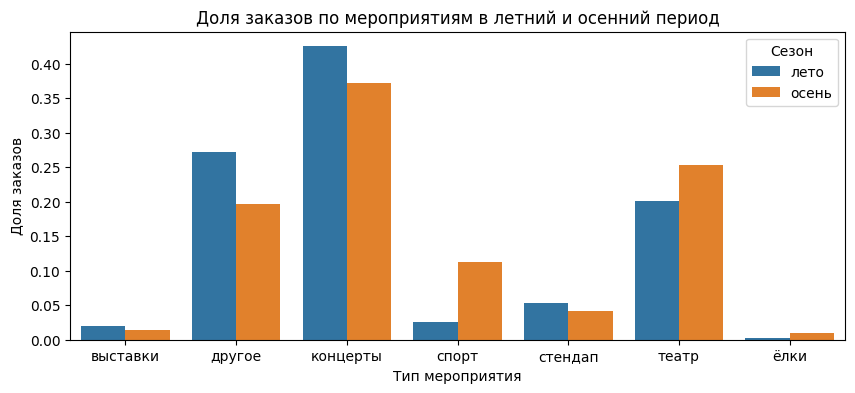

In [58]:
# Построим график - столбчатую диаграмму
plt.figure(figsize=(10, 4))
sns.barplot(
    data=df_grouped_orders_events,
    x='event_type_main', 
    y='order_share',
    hue = 'season'
)

plt.title('Доля заказов по мероприятиям в летний и осенний период')
plt.ylabel('Доля заказов')
plt.xlabel('Тип мероприятия')
plt.legend(title='Сезон')
plt.show() 

*Промежуточный вывод о распределении заказов билетов по типам мероприятий*

Для осеннего периода наблюдается спад интереса в категориях 'концерты' и 'другое', а также небольшой спад в категориях 'выставки' и 'стендап'. При этом осенью наблюдается рост в категориях 'спорт', 'театр', 'елки'.

##### Сравнение распределения заказов билетов по типам устройств

In [59]:
# Cравним распределение заказов билетов для осеннего и летнего периодов по типу устройств
df_grouped_orders_devices = df_final.groupby(['season', 'device_type_canonical'])['order_id'].count().reset_index()

# Переименуем поле для удобства
df_grouped_orders_devices = df_grouped_orders_devices.rename(columns={'order_id': 'order_count'})

# Считаем общее количество заказов по каждому сезону
total_season_devices = df_grouped_orders_devices.groupby('season')['order_count'].transform(sum)

# Добавим долю
df_grouped_orders_devices['order_share'] = df_grouped_orders_devices['order_count'] / total_season_devices

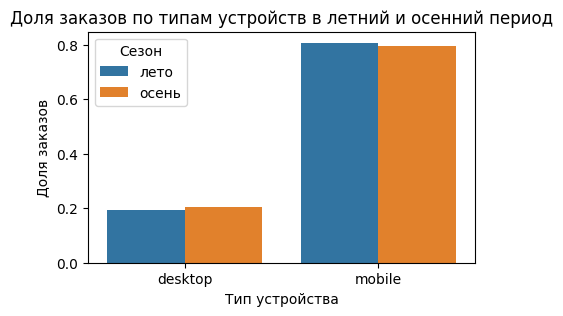

In [60]:
# Построим график - столбчатую диаграмму
plt.figure(figsize=(5, 3))
sns.barplot(
    data=df_grouped_orders_devices,
    x='device_type_canonical', 
    y='order_share',
    hue = 'season'
)

plt.title('Доля заказов по типам устройств в летний и осенний период')
plt.ylabel('Доля заказов')
plt.xlabel('Тип устройства')
plt.legend(title='Сезон')
plt.show() 

*Промежуточный вывод о распределении заказов по типам устройств в летний и осенний период:*

Мобильные утройства лидируют и в осенний, и в летний период. Разница между долями использования мобильных и десктопных устройств в зависимости от сезона минимальна.

##### Сравнение распределения заказов билетов в зависимости от возрастного рейтинга мероприятия

In [61]:
# Cравним распределение заказов билетов для осеннего и летнего периодов в зависимости от возрастного рейтинга мероприятия
df_grouped_orders_ages = df_final.groupby(['season', 'age_limit'])['order_id'].count().reset_index()

# Переименуем поле для удобства
df_grouped_orders_ages = df_grouped_orders_ages.rename(columns={'order_id': 'order_count'})

# Считаем общее количество заказов по каждому сезону
total_season_ages = df_grouped_orders_ages.groupby('season')['order_count'].transform(sum)

# Добавим долю
df_grouped_orders_ages['order_share'] = df_grouped_orders_ages['order_count'] / total_season_ages

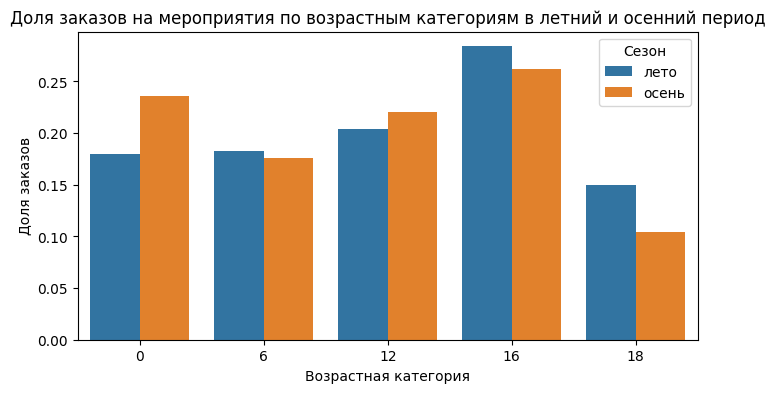

In [62]:
# Построим график - столбчатую диаграмму
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_grouped_orders_ages,
    x='age_limit', 
    y='order_share',
    hue = 'season'
)

plt.title('Доля заказов на мероприятия по возрастным категориям в летний и осенний период')
plt.ylabel('Доля заказов')
plt.xlabel('Возрастная категория')
plt.legend(title='Сезон')
plt.show() 

*Промежуточный вывод о распределении заказов билетов в зависимости от возрастного рейтинга мероприятия*

В осенний период снижается доля заказов для возрастных категорий '16' и '18', а также немного снижается для категории '6', при этом повышается доля заказов для возрастных категорий '0', '12'.

#### Изменение выручки с продажи одного билета в зависимости от типа мероприятий

In [63]:
# Рассчитаем среднюю выручку с продажи одного билета в разрезе категорий мероприятий 
df_grouped_revenue_events = df_final.groupby(['season', 'event_type_main'])['one_ticket_revenue_rub'].mean().reset_index()

#display(df_grouped_revenue_events)

In [64]:
# Сформируем сводную таблицу
pivot_ticket_revenue = pd.pivot_table(df_grouped_revenue_events,
                                      index='event_type_main',
                                      columns='season',
                                      values='one_ticket_revenue_rub'
)
pivot_ticket_revenue['price_change'] =  (
    (pivot_ticket_revenue['осень'] - pivot_ticket_revenue['лето']) 
    / pivot_ticket_revenue['лето']
) * 100

pivot_ticket_revenue = pivot_ticket_revenue.sort_values('price_change')
#display(pivot_ticket_revenue)

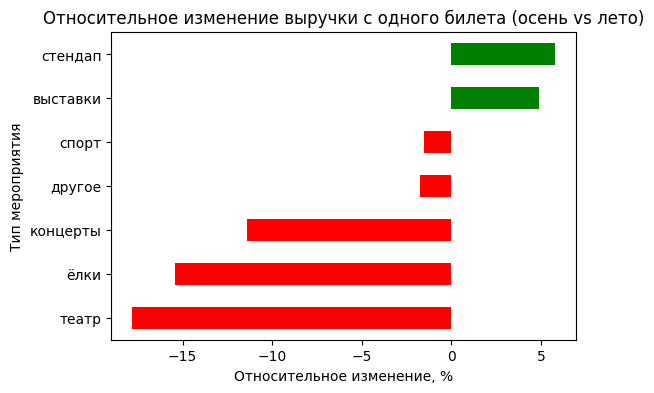

In [65]:
# Создаем список цветов
colors = pivot_ticket_revenue['price_change'].apply(lambda x: 'green' if x > 0 else 'red')

# Построим линейчатую диаграмму
plt.figure(figsize=(6, 4))
pivot_ticket_revenue['price_change'].sort_values().plot(
    kind='barh',
    color = colors)

plt.xlabel('Относительное изменение, %')
plt.ylabel('Тип мероприятия')
plt.title('Относительное изменение выручки с одного билета (осень vs лето)')
plt.show()

*Промежуточный вывод об изменении выручки с продажи одного билета в зависимости от типа мероприятия:*

От лета к осени относительное изменение выручки с одного билета растет для категорий стендап и выставки. Для остальных категорий выручка падает, при этом сильнее всего для категорий концерты, елки и театр. Возможно, это связано с тем, что осенью на рынке появляются более бюджетные предложения 

#### Вывод

1. Наблюдается рост количества заказов от июня к ноябрю 2024 года.
2. Для осеннего периода наблюдается спад интереса в категориях 'концерты' и 'другое', а также небольшой спад в категориях 'выставки' и 'стендап'. При этом осенью наблюдается рост в категориях 'спорт', 'театр', 'елки'.
3. Мобильные утройства лидируют и в осенний, и в летний период. Разница между долями использования мобильных и десктопных устройств в зависимости от сезона - минимальна.
4. В осенний период снижается доля заказов для возрастных категорий '16' и '18', а также немного снижается для категории '6', при этом повышается доля заказов для возрастных категорий '0', '12'.
5. От лета к осени относительное изменение выручки с одного билета растет для категорий 'стендап' и 'выставки'. Для остальных категорий выручка падает, при этом сильнее всего для категорий 'концерты', 'елки' и 'театр'. Возможно, это связано с тем, что осенью на рынке появляются более бюджетные предложения.

### Анализ осенней активности пользователей

**Задача:**\
Проаназировать активность пользователей по дням в сентябре и октябре 2024 года для:
- общего числа заказов;
- количества активных пользователей `DAU`;
- среднего числа заказов на одного пользователя;
- средней стоимости одного билета.
  
Изучить недельную цикличность и пользовательскую активность в будни и выходные.

In [66]:
# Предварительно отфильтруем датафрейм, оставим данные за сентябрь и октябрь
df_autumn = df_final[df_final['season'] == 'осень']

#### Динамика изменения пользовательской активности по дням

In [67]:
# Сформируем сводную таблицу
pivot_autumn = pd.pivot_table(df_autumn,
                              index='created_dt_msk',
                              values=['order_id', 'user_id', 'one_ticket_revenue_rub'],
                              aggfunc={
                                 'order_id':'count',
                                 'user_id':'nunique',
                                 'one_ticket_revenue_rub':'mean'
                              }
                             )
# Добавим столбец со средним числом заказов на пользователя
pivot_autumn['orders_per_user'] = pivot_autumn['order_id']/pivot_autumn['user_id']
#display(pivot_autumn)

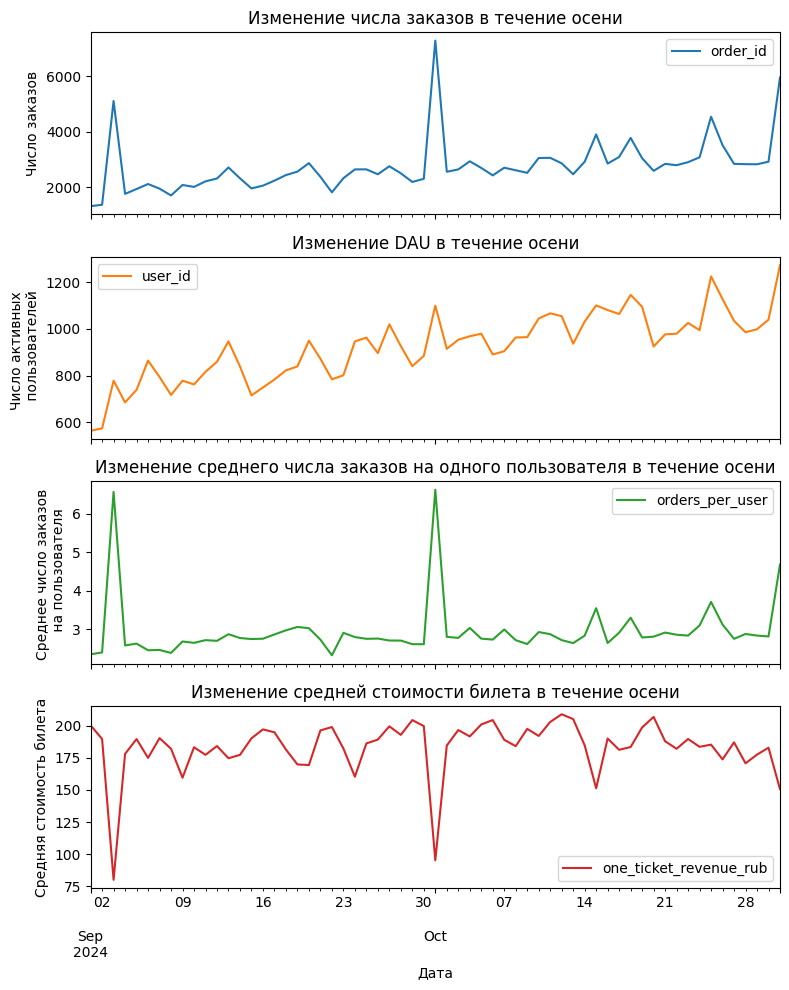

In [68]:
# Построим линейные графики с визуализацией метрик
metrics = ['order_id', 'user_id', 'orders_per_user', 'one_ticket_revenue_rub']

titles = [
    'Изменение числа заказов в течение осени',
    'Изменение DAU в течение осени',
    'Изменение среднего числа заказов на одного пользователя в течение осени',
    'Изменение средней стоимости билета в течение осени'
]

axes = pivot_autumn[metrics].plot(
                         kind='line',
                         subplots=True,
                         sharex=True,
                         sharey =False,
                         title=titles,
                         figsize=(8, 10))
# Устанавливаем подпись для оси Y каждого из подграфиков
axes[0].set_ylabel('Число заказов')
axes[1].set_ylabel('Число активных \n пользователей')
axes[2].set_ylabel('Среднее число заказов \n на пользователя')
axes[3].set_ylabel('Средняя стоимость билета')

# Подписываем ось Х и выводим график
plt.xlabel('Дата')
plt.tight_layout()
plt.show()

*Промежуточный вывод о динамике изменения пользовательской активности по дням*\
1. Наблюдается всплеск общего числа заказов в начале каждого из двух месяцев. При этом наблюдается общий тренд на рост числа заказов в течение осени.
2. Для DAU так же наблюдается тенденция к росту в течение осени. Тренд представляет собой пилообразную кривую.
3. Среднее число заказов на пользователя имеет всплеск в начале каждого месяца.
4. Изменение средней стоимости билета резко падает в начале каждого месяца, а затем выходит на средний уровень.

Аномальное поведение покупателей в начале каждого месяца может быть связано с тем, что площадки выкладывают билеты на новые мероприятия в начале месяца, зная это, покупатели активизируются и в первые дни месяца скупают наиболее дешевые билеты. Кроме этого, совпадение аномальных всплесков средней цены и количества заказов может быть связано с проведением акций или распродаж в начале каждого из месяцев.

Если отбросить данное поведение покупателей в начале каждого месяца, в течение осени постепенно повышается активность покупаталей за счет увеличения числа заказов и DAU

#### Недельная зависимость активности пользователей (недельная цикличность)

In [69]:
#В сформированную ранее сводную таблицу добавим информацию о днях недели
pivot_autumn = pivot_autumn.reset_index()
pivot_autumn['days_of_weeks'] = pivot_autumn['created_dt_msk'].dt.dayofweek

In [70]:
# Создадим функцию, которая определит, является ли день будним или выходным
def days(day_of_week):
    if day_of_week in [0, 1, 2, 3, 4]:
        return 'будний'
    else:
        return 'выходной'

# Создадим столбец, который выведет тип для недели(будний или выходной)
pivot_autumn['weekday_type'] = pivot_autumn['days_of_weeks'].apply(days)

In [71]:
# Выведем на экран сводную таблицу
#display(pivot_autumn)

In [72]:
# Сгруппируем данные по типу дня недели и рассчитаем средние значения по интересующим метрикам
pivot_autumn_grouped = pivot_autumn.groupby('weekday_type')[
    ['user_id', 'order_id', 'orders_per_user', 'one_ticket_revenue_rub']
].mean().reset_index()

# Изменим названия столбцов
pivot_autumn_grouped = pivot_autumn_grouped.rename(columns={
    'user_id': 'DAU',
    'order_id': 'order_count',
    'orders_per_user': 'avg_orders_per_user',
    'one_ticket_revenue_rub': 'avg_ticket_price'
})

# Выведем результат
display(pivot_autumn_grouped)


,weekday_type,DAU,order_count,avg_orders_per_user,avg_ticket_price
0,будний,937.204545,2905.022727,3.064540,178.466543
1,выходной,887.588235,2394.764706,2.674437,195.100685


*Промежуточный вывод о недельной активности пользователей:*
* В будние дни выше DAU, среднее количество заказов и среднее количество заказов на пользователя
* В будние дни ниже средняя цена билета
  
 При этом необходимо принимать во внимание, что количество будней и выходных в течение недели разное.

#### Вывод по результатам анализа пользовательской активности по дням за период сентябрь - октябрь и типам дней недели (будние / выходные)

1. Наблюдается всплеск общего числа заказов в начале месяцев. Выявлен тренд на общий рост числа заказов в течение сентября и октября.

2. Для DAU наблюдается тенденция к росту в течение сентября и октября. Тренд представляет собой пилообразную кривую.

3. Среднее число заказов на пользователя имеет всплеск в начале каждого месяца 

4. Изменение средней стоимости билета резко падает в начале каждого месяца, а затем выходит на средний уровень. Аномальное поведение покупателей в начале каждого месяца может быть связано с тем, что площадки выкладывают билеты на новые мероприятия в начале месяца, зная это, покупатели активизируются и скупают наиболее дешевые билеты. Так же в начале месяцев могут проходить скидки. Если отбросить данное поведение покупателей в начале каждого месяца, в течение осени постепенно повышается активность покупателей за счет увеличения числа заказов и DAU.

5. В будние дни выше DAU, среднее количество заказов и среднее количество заказов на пользователя. В будние дни ниже средняя цена билета.

### Анализ мероприятий в разрезе регионов и билетных партнеров

**Задача:** Проанализировать распределение мероприятий по регионам и партнёрам с целью выделить ключевые регионы и партнёров.
- Для регионов вычислить уникальное количество мероприятий и общее число заказов.
- Для билетных партнеров проанализировать общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов.

#### Анализ количества мероприятий в разрезе регионов

In [73]:
# Перед проведение анализа сгруппируем данные по регионам и посчитаем количество уникальных мероприятий и общее число заказов
df_regions = df_autumn.groupby(['region_name']).agg({
    'event_id': 'nunique',
    'order_id': 'count'
})

In [74]:
# Отсортируем данные по убыванию количества мероприятий
df_regions = df_regions.sort_values('event_id', ascending=False)
#display(df_regions)

In [75]:
# Вычислим долю уникального количества мероприятий и общего числа заказов
total_events = df_autumn['event_id'].nunique()
total_orders = df_autumn['order_id'].count()
df_regions['events_share'] = round(df_regions['event_id'] / total_events*100, 2)
df_regions['order_share'] = round(df_regions['order_id'] / total_orders*100, 2)

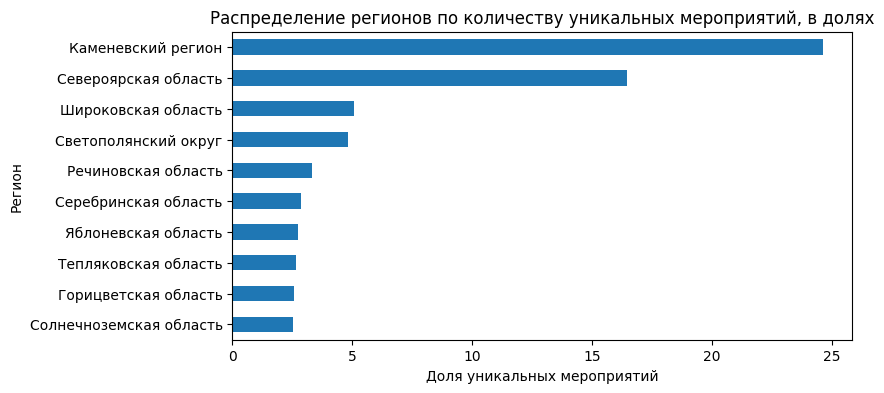

In [76]:
# Отбираем топ-10 регионов
top_regions_events = df_regions['events_share'].sort_values(ascending=False).head(10)

# Построим визуализацию
plt.figure(figsize=(8, 4))
top_regions_events.sort_values().plot(kind='barh',)
plt.xlabel('Доля уникальных мероприятий')
plt.ylabel('Регион')
plt.title('Распределение регионов по количеству уникальных мероприятий, в долях')
plt.show()

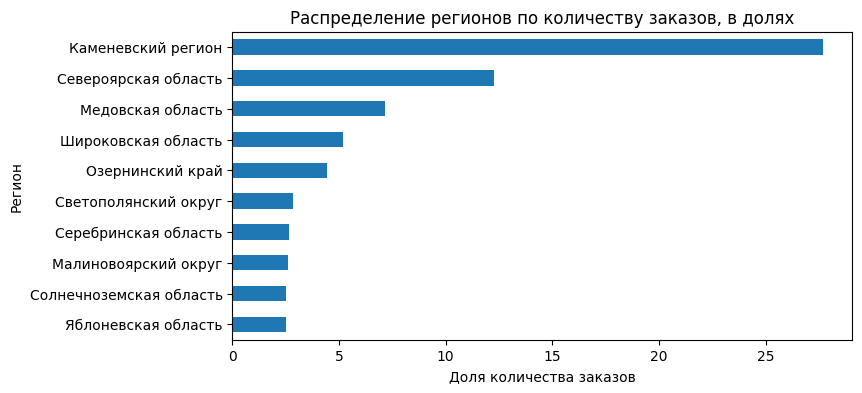

In [77]:
# Отберем топ-10 регионов по количеству заказов
top_regions_orders = df_regions['order_share'].sort_values(ascending=False).head(10)

# Построим визуализацию
plt.figure(figsize=(8, 4))
top_regions_orders.sort_values().plot(kind='barh',)
plt.xlabel('Доля количества заказов')
plt.ylabel('Регион')
plt.title('Распределение регионов по количеству заказов, в долях')
plt.show()

*Промежуточный вывод о популярных регионах:* 

Наибольшее разнообразие мероприятий наблюдается для следующих регионов (топ-5):
1. Каменевский регион	
2. Североярская область	
3. Широковская область	
4. Светополянский округ	
5. Речиновская область

#### Анализ мероприятий в разрезе билетных партнеров

In [78]:
# сгруппируем данные по билетным партнерам и посчитаем количество уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов
df_partners = df_autumn.groupby(['service_name']).agg({
    'event_id': 'nunique',
    'order_id': 'count',
    'revenue_rub': 'sum'
})

# Вычислим доли
total_revenue = df_autumn['revenue_rub'].sum()

df_partners['events_share'] = round(df_partners['event_id'] / total_events*100, 2)
df_partners['order_share'] = round(df_partners['order_id'] / total_orders*100, 2)
df_partners['revenue_share'] = round(df_partners['revenue_rub'] / total_revenue*100, 2)

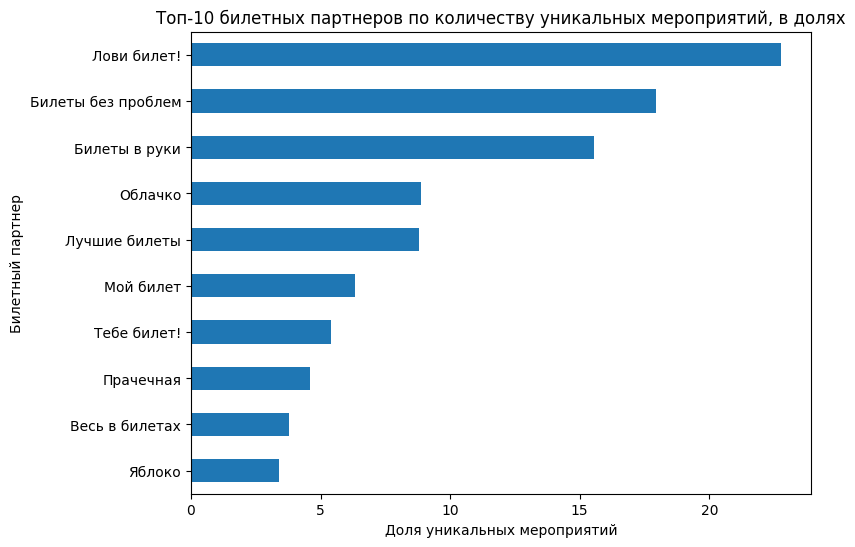

In [79]:
# Построим визуализацию
plt.figure(figsize=(8, 6))
df_partners['events_share'].nlargest(10).sort_values().plot(kind='barh',)
plt.xlabel('Доля уникальных мероприятий')
plt.ylabel('Билетный партнер')
plt.title('Топ-10 билетных партнеров по количеству уникальных мероприятий, в долях')
plt.show()

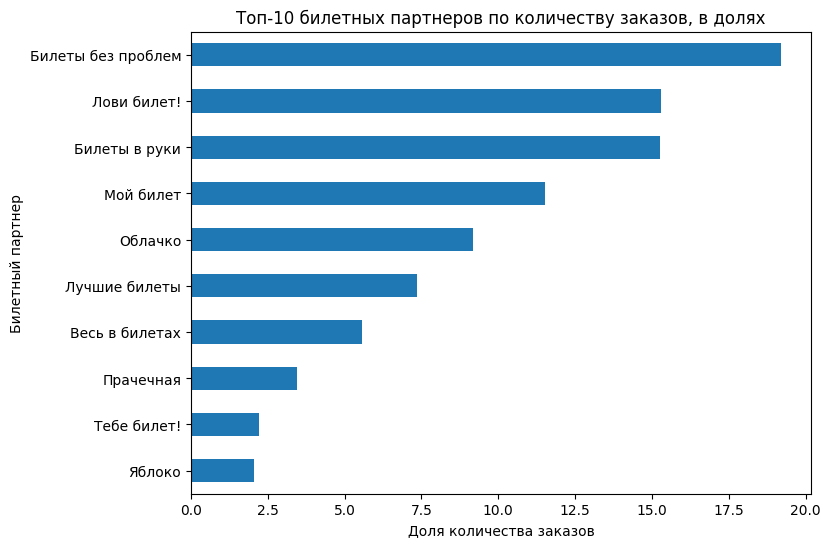

In [80]:
# Построим визуализацию
plt.figure(figsize=(8, 6))
df_partners['order_share'].nlargest(10).sort_values().plot(kind='barh',)
plt.xlabel('Доля количества заказов')
plt.ylabel('Билетный партнер')
plt.title('Топ-10 билетных партнеров по количеству заказов, в долях')
plt.show()

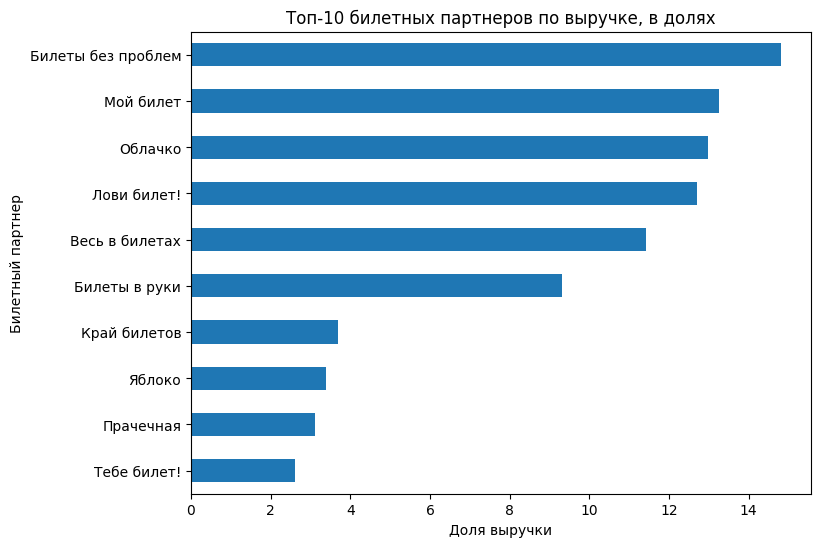

In [81]:
# Построим визуализацию
plt.figure(figsize=(8, 6))
df_partners['revenue_share'].nlargest(10).sort_values().plot(kind='barh',)
plt.xlabel('Доля выручки')
plt.ylabel('Билетный партнер')
plt.title('Топ-10 билетных партнеров по выручке, в долях')
plt.show()

*Промежуточный вывод об активности билетных партнеров:*
Среди билетных партнеров выявлено следующее:
1. Лови билет, билеты без проблем и билеты в руки - топ 3 билетных партнера по количеству уникальных мероприятий.
2. Билеты без проблем, лови билет и билеты в руки - топ 3 билетных партнера по количеству обработанных заказов.
3. Билеты без проблем, мой билет и облачко - топ 3 билетных партнера по выручке.

При этом в системе наблюдается большое количество билетных партнеров (порядка 10-15 шт), у которых не наблюдается активность при продаже билетов (данные на графиках не отображены).

#### Вывод об анализе мероприятий в разрезе регионов и билетных партнеров

Активность по регионам и билетным партнерам:
1. Наблюдается два региона, в которых активность максимальна (Каменевский регион, Североярская область), для остальных регионов выражен отрыв по количеству уникальных мероприятий и заказов.
2. Существуют регионы, для которых активность минимальна и практически отсутствует.
3. Топ-3 билетных партнера по количеству уникальных мероприятий: 'Лови билет', 'Билеты без проблем' и 'Билеты в руки'.
4. Топ-3 билетных партнера по количеству обработанных заказов: 'Билеты без проблем', 'Лови билет' и 'Билеты в руки'.
5. Топ-3 билетных партнера по объему выручки: 'Билеты без проблем', 'Мой билет' и 'Облачко'.
6. При этом в системе наблюдается большое количество билетных партнеров (порядка 10-15 шт), у которых не наблюдается активность при продаже билетов (на графиках не отображены).

## Статистический анализ данных

### Проверка гипотезы об активности пользователей мобильных и стационарный устройств

**Задача:** Проверить гипотезу о разнице активности пользователей мобильных и стационарных устройств

**H0**: Среднее количество заказов на одного пользователя мобильного приложения равно среднему количеству заказов пользователей стационарных устройств.

**Н1:** Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.

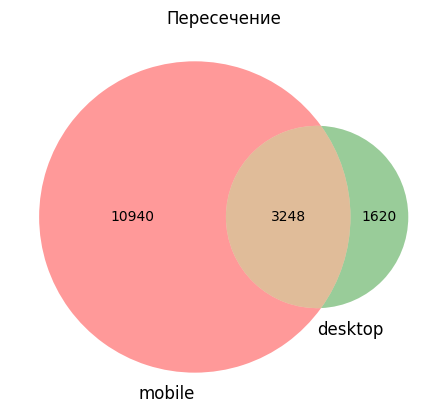

In [82]:
# Выполним проверку независимости пользователей групп в разрезе типа устройства

mobile_id = set(df_autumn[df_autumn['device_type_canonical']=='mobile']['user_id'].dropna().unique())
desktop_id = set(df_autumn[df_autumn['device_type_canonical']=='desktop']['user_id'].dropna().unique())

# Строим диаграмму Венна
venn2([mobile_id, desktop_id], set_labels=('mobile', 'desktop'))

# Отображаем график
plt.title("Пересечение")
plt.show()

*Промежуточный вывод*: Пользователи пересекаются, выявлено 3248 пользователей, входящих обе группы в разрезе типа устройств (мобильное / стационарное)

In [83]:
# Найдем пересекающихся пользователей
overlap_users = mobile_id & desktop_id

# Создадим датафрейм, из которого исключим пользователей, входящих в обе группы
df_autumn_independent = df_autumn[~df_autumn['user_id'].isin(overlap_users)]

In [84]:
# Создадим выборки для пользователей десктопного и мобильного приложений и считаем количество заказов
mobile_order_count = df_autumn_independent[df_autumn_independent['device_type_canonical']=='mobile'].groupby('user_id')['order_id'].count()
avg_order_mobile = round(mobile_order_count.mean(), 2)

desktop_order_count = df_autumn_independent[df_autumn_independent['device_type_canonical']=='desktop'].groupby('user_id')['order_id'].count()
avg_order_desktop = round(desktop_order_count.mean(), 2)

display(f'Среднее кол-во заказов на 1 пользователя мобильного приложения {avg_order_mobile}')
display(f'Среднее кол-во заказов на 1 пользователя десктопного приложения {avg_order_desktop}')

'Среднее кол-во заказов на 1 пользователя мобильного приложения 2.86'

'Среднее кол-во заказов на 1 пользователя десктопного приложения 1.97'

In [85]:
# Проверим нормальность распределения с использованием теста Шапиро
shapiro(mobile_order_count) 
shapiro(desktop_order_count)

C:\Users\user\anaconda3\envs\practicum\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.30036985874176025, pvalue=0.0)

*Промежуточный вывод*: Тест о нормальности тестом Шапиро отвергается, так как p-value=0 (меньше 0.05). В силу ЦПТ все равно будет использоваться t-тест Стьюдента

In [86]:
# Применяем t-test
alpha = 0.05

results = st.ttest_ind(
    mobile_order_count, 
    desktop_order_count, 
    alternative='greater'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.911721617208012e-17
Отвергаем нулевую гипотезу


**Вывод:**

Гипотеза **Н1** нашла подтверждение, пользователи мобильных устройств совершают в среднем большее количество заказов, чем пользователи десктопных устройств:

* Проверена независимость выборок, из выборок удалены 3248 пользователей, пользовавшихся как мобильным, так и десктопным приложением, для проверки гипотез использовался датафрейм `df_autumn_independent`
* Рассчитано среднее количество заказов на одного пользователя мобильного и десктопного приложения, 2.86 и 1.97 заказов, соответственно.
* Проведена проверка нормальности распеределения тестом Шапиро. p value составило 0, гипотеза о нормальности распеределений была отвергнута.
* Проведен t-test Стьюдента с использованием метода ttest_ind, p value стремится к нулю при альфа 0.5, нулевая гипотеза отвергнута, подтверждение нашла гипотеза Н1.

### Проверка гипотезы о среднем времени между заказами в зависимости от типа устройства

**Задача:** Проверить гипотезу о среднем времени между заказами для пользователей мобильных и стационарных устройств.

**H0:** Среднее время между заказами пользователей мобильных приложений такое же, как и у пользователей стационарных устройств.

**Н1:** Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

In [87]:
# Отфильтруем данные и уберем пропуски
mobile_days = df_autumn_independent[df_autumn_independent['device_type_canonical'] == 'mobile']['days_since_prev'].dropna()
desktop_days = df_autumn_independent[df_autumn_independent['device_type_canonical'] == 'desktop']['days_since_prev'].dropna()

In [88]:
# Рассчитаем средние значения количества дней между заказами
avg_days_mobile = mobile_days.mean()
avg_days_desktop = desktop_days.mean()

print(f'Среднее время между заказами (mobile): {round(avg_days_mobile, 2)} дней')
print(f'Среднее время между заказами (desktop): {round(avg_days_desktop, 2)} дней')


Среднее время между заказами (mobile): 3.56 дней
Среднее время между заказами (desktop): 3.89 дней


In [89]:
# Проверим нормальность распределения
shapiro(mobile_days) 
shapiro(desktop_days)

ShapiroResult(statistic=0.33683323860168457, pvalue=0.0)

*Промежуточный вывод:* Распределение не является нормальным, используем тест Манна-Уитни и t-test Стьюдента

In [90]:
# Применяем тест Манна — Уитни

alpha = 0.05
stat_mw, p_value_mw = mannwhitneyu(
    mobile_days, 
    desktop_days, 
    alternative='greater'
) 

if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Не получилоь отвергнуть нулевую гипотезу')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Отвергаем нулевую гипотезу')

pvalue=0.8247921208009672 > 0.05
Не получилоь отвергнуть нулевую гипотезу


In [91]:
# Применяем t-test
alpha = 0.05

results = st.ttest_ind(
    mobile_days, 
    desktop_days, 
    alternative='greater'
)

print(f'pvalue={results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

pvalue=0.9244460697801774
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Нулевая **Н0** гипотеза нашла подтверждение, что говорит от том, что пользователи мобильных устройств совершают следующий заказ в среднем через столько же дней, что и пользователи десктопных устройств:

*Рассчитано среднее время между заказами на одного пользователя мобильного и десктопного приложения и составило 3.56 и 3.89 дней, соответственно.
*Проведена проверка нормальности распеределения тестом Шапиро. p value составило 0, нормальность распеределений была отвергнута
*Для проверки статистической гипотезы использоался тест Манна-Уитни, p value составило 0.824 при альфа 0.5.
*Также был проведен статистический t-тест Стьюдента,  p value составило 0.924 при альфа 0.5

## Выводы и рекомендации

**Выводы:**

1. Был проведен анализ следующих данных:
    1. Информация о заказах билетов, совершенных с двух типов устройств - мобильных и стационарных. Сформирован и изучен датафрейм `df_orders`.
    2. Информация о событиях, включая город и регион события, информация о площадке проведения мероприятия. Сформирован и изучен датафрейм `df_events`.
    3. Информация о курсе тенге к российскому рублю за 2024 год. Сформирован и изучен датафрейм `df_currency`.
2. Проведена **предобработка** данных, в результате которой сформирован результирующий датафрейм `df_final`, который использовался для исследовательского анализа данных и проверки гипотез.  Данные подготовленны к работе и достаточны для объективного исследования.
    Финальный датафрейм `df_final` включает в себя 287411 строк, исходный датафрейм включал в себя 290849 строк.
    
3. Выполнен **исследовательский анализ данных**:
    1. Анализ распределения заказов по сегментам и их сезонные изменения
       1. Наблюдается рост количества заказов от июня к ноябрю 2024 года
       2. Для осеннего периода наблюдается спад интереса в категориях концерты и другое, а также небольшой спад в категориях выставки и стендап. При этом осенью наблюдается рост в категориях спорт, театр, елки
       3. Мобильные утройства лидируют и в осенний, и в летний период. Разница между долями использования мобильных и десктопных устройств в зависимости от сезона - минимальна
       4. В осенний период снижается доля заказов для возрастных категорий 16 и 18, а также немного снижается для категории 6, при этом повышается доля заказов для возрастных категорий 0, 12
       5. От лета к осени относительное изменение выручки с одного билета растет для категорий стендап и выставки. Для остальных категорий выручка падает, сильнее всего для категорий концерты, елки и театр. Возможно, это связано с тем, что осенью на рынке появляются более бюджетные предложения
       
   2. Осенняя активность пользователей
      1. Наблюдается всплеск общего числа заказов в начале месяцев. В целом, наблюдается тренд на рост числа заказов в течение осени
      2. Для DAU также наблюдается тенденция к росту в течение осени. Тренд представляет собой пилообразную кривую
      3. Среднее число заказов на пользователя имеет всплеск в начале каждого месяца
      4. Изменение средней стоимости билета резко падает в начале каждого месяца, а затем выходит на средний уровень.       
       5. В будние дни выше DAU, среднее количество заказов и среднее количество заказов на пользователя.
       6. В будние дни ниже средняя цена билета.

   3.  Популярные события и партнеры
       1. Наблюдается два региона, в которых активность максимальна (Каменевский регион, Североярская область), для остальных регионов выражен отрыв по количеству уникальных мероприятий и заказов
       2. Существуют регионы, для которых активность минимальна и практически отсутствует
       3. 'Лови билет', 'Билеты без проблем' и 'Билеты в руки' - топ 3 билетных партнера по количеству уникальных мероприятий
       4. 'Билеты без проблем', 'Лови билет' и 'Билеты в руки' - топ 3 билетных партнера по количеству обработанных заказов
       5. 'Билеты без проблем', 'Мой билет' и 'Облачко' - топ 3 билетных партнера по выручке
    
4. **Статистический анализ данных**. Проверены следующие гипотезы:
    1.  Среднее количество заказов
  
       H0: Среднее количество заказов на одного пользователя мобильного приложения равно среднему количеству заказов пользователей стационарных устройств.
  
       Н1: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
  
       Подтвердилась гипотеза Н1: пользователи мобильных устройств совершают в среднем большее количество заказов, по сравнению с пользователиями десктопных устройств.
  
       Проведена проверка нормальности распеределения тестом Шапиро. p value составило 0, нормальность распеределений была отвергнута.
  
       Для проверки статистической гипотезы использоался t-тест Стьюдента, p value стремится к нулю при альфа 0.5.
    
    2. Среднее время между заказами
  
       Среднее время между заказами пользователей мобильных приложений такое же, как и у пользователей стационарных устройств.
  
       Н1: Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.
  
       Нулевая гипотеза нашла подтверждение, пользователи мобильных устройств совершают следующий заказ в среднем через столько же дней, что и пользователи десктопных устройств.
  
       Проведена проверка нормальности распеределения тестом Шапиро. p value составило 0, нормальность распеределений была отвергнута.
  
       Для проверки статистической гипотезы использовался тест Манна-Уитни, p value составило 0.824 при альфа 0.5. Также был проведен статистический t-тест Стьюдента, p value составило 0.924 при альфа 0.5.

**Рекомендации:**

При расчете скидочных кампаний, маркетинговых стратегий и планировании продаж на зимний период, рекомендуется следующее:
1. Рекомендуется выстроить маркетинговые кампании вокруг следующих категорий мероприятий:  'спорт', 'театр', 'елки' по причине того, что ожидается продолжение роста заказов к зиме. 
2. В связи с бОльшей долей использоватения мобильных устройств по сравнению со стационарными устройствами, рекомендуется сконцентрироваться на добавлении дополнительных акций в мобильные приложения и в мобильные версии сайтов.
3. Рекомендуется сконцентрироваться на кампаниях для мероприятий среди возрастных категорий 0, 12.
4. Выручка может падать в связи с появление бюджетных предложений, в связи с этим можно увеличить количество рекламы для более дорогих предложений.
5. В начале месяцев всплеск общего числа заказов, можно добавить акции и рекламу в первые числа месяцев.
6. В связи повышенной активностью пользователей в будние дни, рекомендуется концентрироваться на проведении маркетинговых акций в будние дни. 
7. Рекомендуется сконцентироваться на двух регионах: Каменевский регион и Североярская область.
8. Наибольший потенциал по выручке имеют 3 билетных партнера: 'Билеты без проблем', 'Мой билет' и 'Облачко'. Возможно имеет смысл продумать особые маркетинговые кампании с ними.
9. Среднее количество заказов для пользователей мобильного приложения статистически значимо выше, что говорит о том, что рекомендуется концентрироваться на пользователях мобильных версий сервиса, готовить для них дополнительные акции и привлекать пользователей в приложение.